<a href="https://colab.research.google.com/github/Leraniki/ML_uni/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/diabetes_dataset.csv')

In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Категориальные признаки: `gender, location, smoking_history`

## Анализ данных

In [12]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


1. **Качество данных:** Данные полные, без пропусков.
2. **Происхождение данных:** Распределение по расам и годам сильно намекает на то, что данные не являются случайной выборкой из реальной популяции. Вероятнее всего, они синтетические или были подвергнуты значительной обработке и балансировке.
4. **Характеристика популяции:** Среднестатистический пациент в этой выборке — это человек среднего возраста (~42 года) с избыточным весом (BMI ~27), у которого показатели сахара в крови (HbA1c, blood_glucose_level) находятся на границе нормы и преддиабета.


In [13]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


**Сильный дисбаланс классов:** Мы видим, что пациентов без диабета гораздо больше, чем с диабетом. Модель, обученная на таких данных, может научиться всегда предсказывать "Нет диабета" и иметь высокую точность (accuracy), но при этом будет бесполезной.

### Числовые признаки

In [15]:
cat_features = ['gender', 'location', 'smoking_history']
X_for_corr = df.drop(cat_features, axis = 1)

<Axes: >

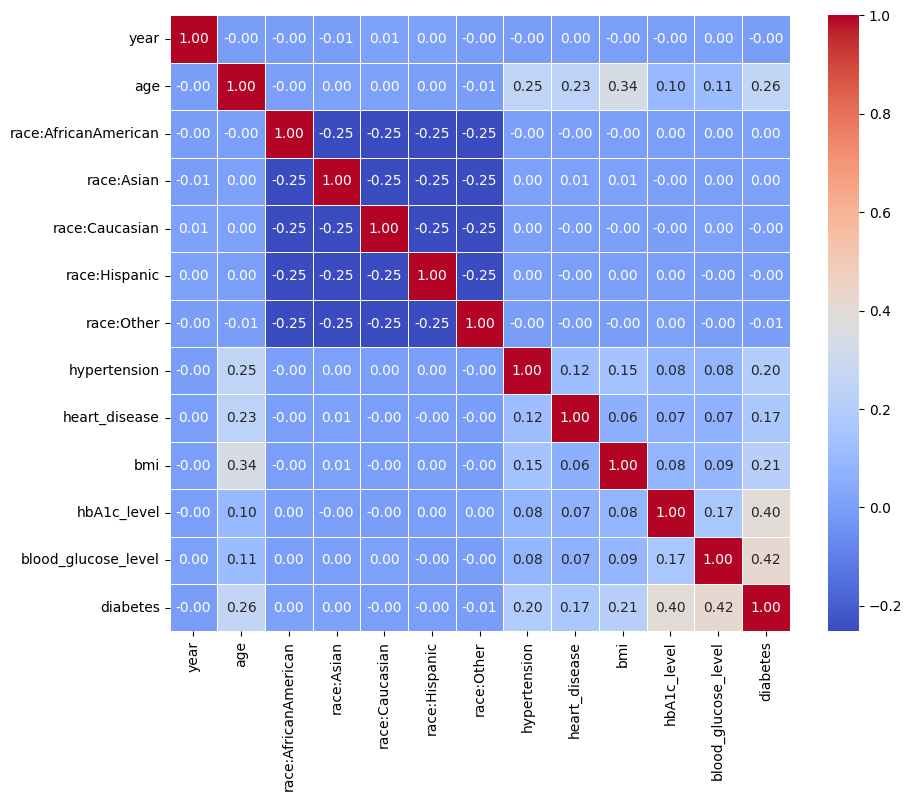

In [25]:
corr_matrix = X_for_corr.corr()

fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, fmt= '.2f', cmap='coolwarm', linewidths=.5)

Из матрицы получаем, что year, race не влияют на таргетную переменную.

### Категориальные признаки

<Figure size 1000x600 with 0 Axes>

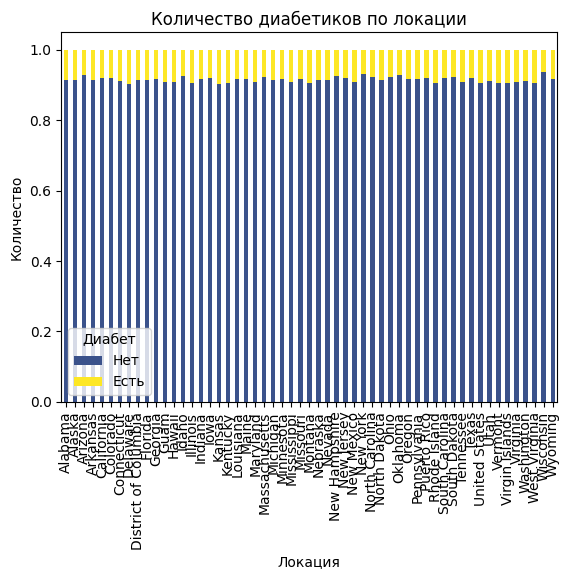

In [34]:
plt.figure(figsize=(10, 6))
location_props = pd.crosstab(df['location'], df['diabetes'], normalize='index')
location_props.plot(kind='bar',
                    stacked=True,
                    color=['#3b528b', '#fde725'])
plt.title('Количество диабетиков по локации')
plt.xlabel('Локация')
plt.ylabel('Количество')
plt.legend(title='Диабет', labels=['Нет', 'Есть'])
plt.show()

Граница между синей и желтой областями проходит практически по прямой горизонтальной линии через весь график. Это означает, что доля людей с диабетом практически одинакова во всех локациях. Она колеблется в очень узком диапазоне.

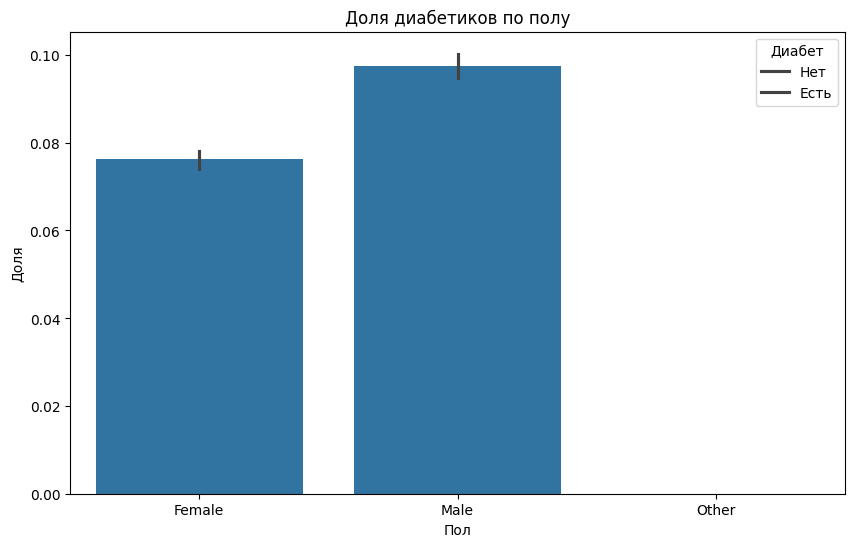

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df['gender'], y = Y)
plt.title('Доля диабетиков по полу')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.legend(title='Диабет', labels=['Нет', 'Есть'])
plt.show()

Доля диабетиков среди мужчин выше, чем среди женщин. Это означает, что этот признак важен. Так же есть столбец `Other`, который является пустым. Поэтому его необходимо удалить

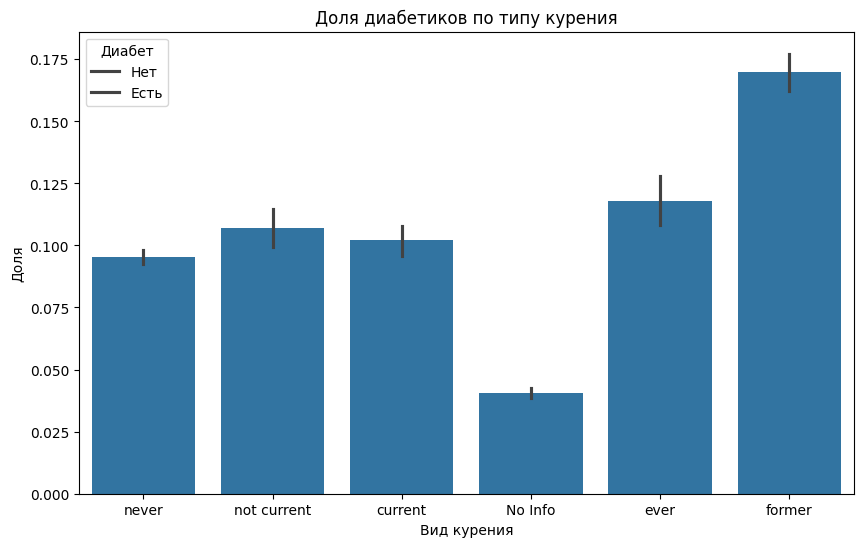

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df['smoking_history'], y = Y)
plt.title('Доля диабетиков по типу курения')
plt.xlabel('Вид курения')
plt.ylabel('Доля')
plt.legend(title='Диабет', labels=['Нет', 'Есть'])
plt.show()


Аналогично получаем, что курение влиет на таргетную переменную. Значения равные `No info` так же необходимо удалить.

### Обработка данных

In [38]:
from sklearn.model_selection import train_test_split

In [66]:
X = df.drop(['diabetes'], axis = 1)
Y = df['diabetes']

Разделяем на тестовую и тренировочную выборки

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [68]:
X_train = X_train.drop(['year', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'location'], axis = 1)

X_train.loc[X_train['gender'] == 'Female', 'gender_new'] = 1
X_train.loc[X_train['gender'] == 'Male', 'gender_new'] = 0
X_train = X_train[X_train['gender']!= 'Other'].copy()
X_train = X_train.drop(['gender'], axis = 1)
X_train = X_train[X_train['smoking_history']!= 'No Info'].copy()

X_encoded = pd.get_dummies(X_train['smoking_history'])

X_fin = pd.concat([X_train, X_encoded], axis = 1)

Проводим OHE для столбца `smoking_history` и заменяя на числа значения столбца `gender`

In [69]:
X_fin.head()

,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,gender_new,current,ever,former,never,not current
44966,58.0,0,0,never,36.71,4.5,155,1.0,False,False,False,True,False
92727,23.0,0,0,ever,26.36,5.0,145,1.0,False,True,False,False,False
51349,60.0,0,0,never,28.29,4.5,200,1.0,False,False,False,True,False
86979,40.0,0,0,never,33.03,6.0,130,1.0,False,False,False,True,False
3806,42.0,0,0,not current,27.32,5.7,159,1.0,False,False,False,False,True


In [70]:
X_fin = X_fin.drop(['smoking_history'], axis = 1)

In [71]:
X_fin.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,gender_new,current,ever,former,never,not current
44966,58.0,0,0,36.71,4.5,155,1.0,False,False,False,True,False
92727,23.0,0,0,26.36,5.0,145,1.0,False,True,False,False,False
51349,60.0,0,0,28.29,4.5,200,1.0,False,False,False,True,False
86979,40.0,0,0,33.03,6.0,130,1.0,False,False,False,True,False
3806,42.0,0,0,27.32,5.7,159,1.0,False,False,False,False,True


In [72]:
X_test = X_test.drop(['year', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'location'], axis = 1)

X_test.loc[X_test['gender'] == 'Female', 'gender_new'] = 1
X_test.loc[X_test['gender'] == 'Male', 'gender_new'] = 0
X_test = X_test[X_test['gender']!= 'Other'].copy()
X_test = X_test.drop(['gender'], axis = 1)
X_test = X_test[X_test['smoking_history']!= 'No Info'].copy()

X_encoded_test = pd.get_dummies(X_test['smoking_history'])

X_fin_test = pd.concat([X_test, X_encoded_test], axis = 1)

In [73]:
X_fin_test = X_fin_test.drop(['smoking_history'], axis = 1)

In [74]:
X_fin_test.head()

,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,gender_new,current,ever,former,never,not current
75721,80.0,0,1,17.01,4.8,200,1.0,True,False,False,False,False
80184,25.0,0,0,48.35,6.5,145,1.0,False,False,False,True,False
19864,33.0,1,0,36.70,6.8,145,1.0,False,True,False,False,False
92991,80.0,0,0,24.30,4.0,100,1.0,False,False,False,False,True
76434,63.0,0,0,37.74,5.7,260,0.0,False,False,True,False,False


Сравниваем размеры тренировочных и тестовых выборок. Они должны совпадать.

In [75]:
Y_train = Y_train.loc[X_fin.index]

In [76]:
Y_test = Y_test.loc[X_fin_test.index]

In [77]:
X_fin.shape[1] == X_fin_test.shape[1]

True

In [79]:
X_fin_test.shape[0] == Y_test.shape[0]


True

In [81]:
X_fin.shape[0] == Y_train.shape[0]

True

**age:** Диапазон примерно от 0 до 80.

**blood_glucose_level:** Диапазон примерно от 80 до 300.

**bmi:** Диапазон примерно от 10 до 95.

Эти признаки имеют совершенно разные масштабы. Поэтому необходимо провести нормализацию

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_fin)
X_test_scaled = scaler.fit_transform(X_fin_test)


## Обучение

### Логистическая регрессия

In [84]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression(class_weight='balanced', random_state=42)

model.fit(X_train_scaled, Y_train)

predict_train = model.predict(X_train_scaled)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
print(classification_report(Y_train, predict_train))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     45638
           1       0.48      0.87      0.62      5640

    accuracy                           0.88     51278
   macro avg       0.73      0.87      0.77     51278
weighted avg       0.93      0.88      0.89     51278



In [97]:
predict_test = model.predict(X_test_scaled)
print(classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     11488
           1       0.48      0.87      0.61      1406

    accuracy                           0.88     12894
   macro avg       0.73      0.88      0.77     12894
weighted avg       0.93      0.88      0.90     12894



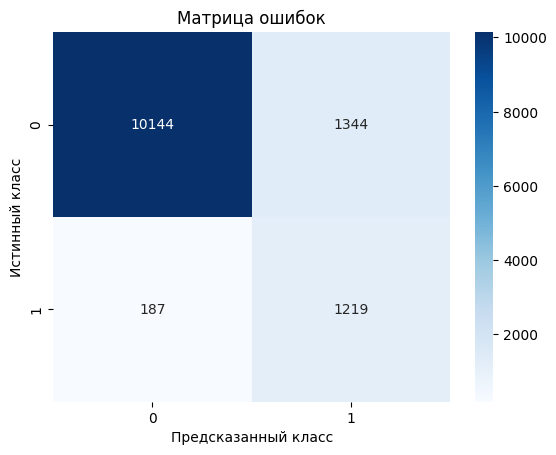

In [102]:
cm = confusion_matrix(Y_test, predict_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

Модель эффективно выявляет большинство пациентов с диабетом (recall=87%), но делает это ценой большого количества ложных тревог (precision=48%). Она очень надежна, когда говорит, что диабета нет, но ее диагнозу "диабет есть" можно доверять лишь в половине случаев.

### Градиентный бустинг (CatBoost)

In [104]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [105]:
from catboost import CatBoostClassifier


In [108]:
model_cat = CatBoostClassifier(
    iterations = 100,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose = 0
)
model_cat.fit(X_train_scaled, Y_train)

predict_train_cat = model_cat.predict(X_train_scaled)

In [109]:
print(classification_report(Y_train, predict_train_cat))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     45638
           1       0.58      0.94      0.72      5640

    accuracy                           0.92     51278
   macro avg       0.79      0.93      0.84     51278
weighted avg       0.95      0.92      0.93     51278



In [110]:
predict_test_cat = model_cat.predict(X_test_scaled)
print(classification_report(Y_test, predict_test_cat))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     11488
           1       0.51      0.89      0.65      1406

    accuracy                           0.90     12894
   macro avg       0.75      0.89      0.79     12894
weighted avg       0.93      0.90      0.91     12894



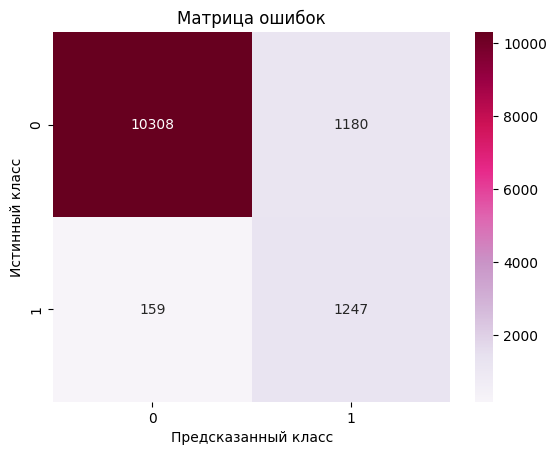

In [122]:
cm = confusion_matrix(Y_test, predict_test_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

Модель CatBoost является явным улучшением по сравнению с логистической регрессией. Она сохраняет ту же превосходную способность находить больных диабетом (recall=89%), но при этом значительно улучшает общий баланс метрик (f1-score и accuracy).
Хотя проблема с большим количеством "ложных тревог" остаётся, CatBoost делает это немного реже, что делает её более эффективной и надёжной моделью для данной задачи.

Accuracy = 0.9: модель стала в целом точнее, правильно классифицируя 90% всех пациентов (было 88%).

Precision = 0.51: Здесь есть небольшое улучшение. Теперь, когда модель говорит "диабет есть", она права в 51% случаев (вместо 48%). Это означает чуть меньше ненужных повторных обследований для здоровых людей.

F1-score = 0.65: Это самое заметное улучшение для целевого класса. F1-score вырос с 0.62 до 0.65, что говорит о том, что CatBoost нашел более оптимальный компромисс между поиском всех больных и минимизацией ложных тревог.